In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import style
from sklearn import datasets
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
%matplotlib notebook

In [2]:
mydataset = pd.read_csv('data.csv', sep = ',')
mydataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
#Checando valores Missing
mydataset.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [4]:
mydataset.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [5]:
print(mydataset.shape)

(2017, 17)


<IPython.core.display.Javascript object>


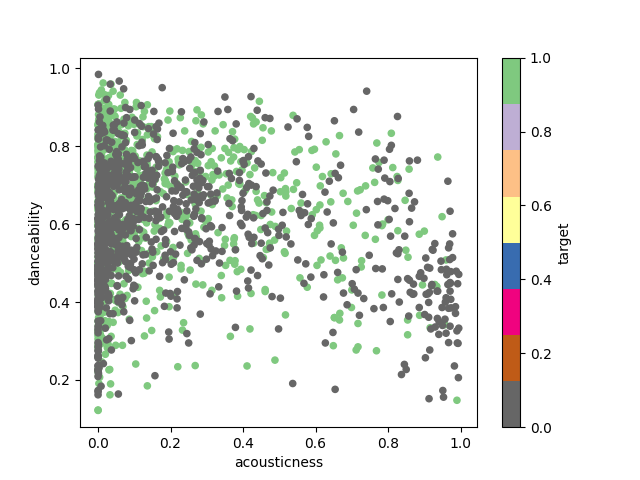

<AxesSubplot:xlabel='acousticness', ylabel='danceability'>

In [6]:
style.use("seaborn-colorblind")
mydataset.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r')

<IPython.core.display.Javascript object>


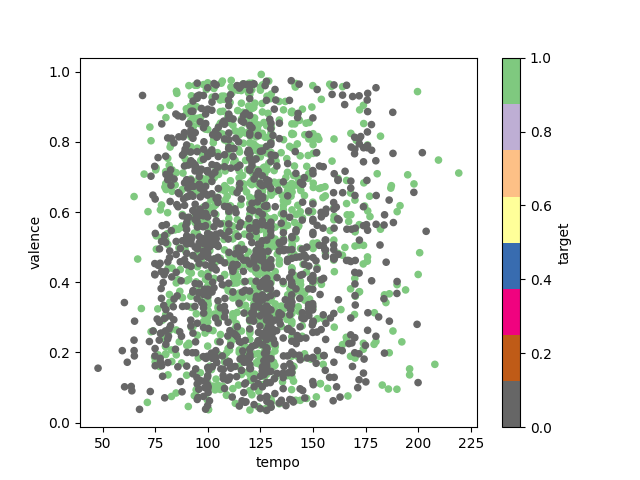

<AxesSubplot:xlabel='tempo', ylabel='valence'>

In [7]:
style.use("seaborn-colorblind")
mydataset.plot(x='tempo', y='valence', c='target', kind='scatter' , colormap='Accent_r')

<IPython.core.display.Javascript object>


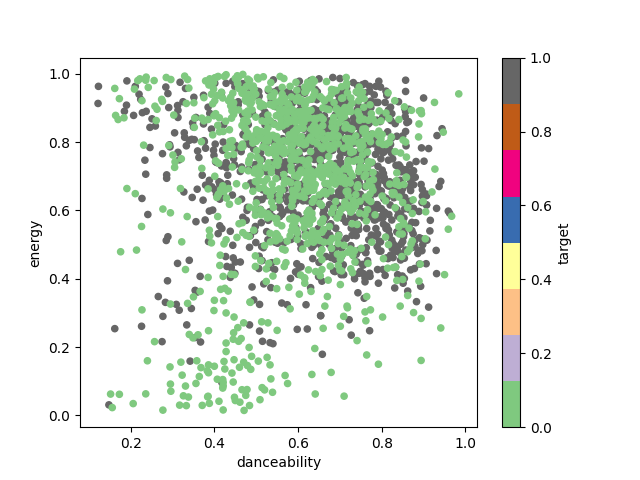

<AxesSubplot:xlabel='danceability', ylabel='energy'>

In [8]:
style.use("seaborn-colorblind")
mydataset.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Accent')

In [9]:
mydataset['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

In [10]:
mydataset.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [11]:
#valores que queremos que o algoritmo classifique
classes = mydataset['target']
#treinaremos o algoritmo com as informações da base, exceto target e song_title
mydataset = mydataset.drop(columns=['target', 'song_title'], axis = 1)

In [12]:
encoder = LabelEncoder()
correto = encoder.fit_transform(mydataset['artist'])

# Cria uma nova coluna chamada 'artist_correction', tratando dados categóricos
mydataset['artist_correction'] = correto

mydataset.drop(columns = ['artist'], axis=1, inplace=True)

In [13]:
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [14]:
def Resultado_pip (pip):
    resultado = cross_val_predict(pip, mydataset, classes, cv = 10)
    return metrics.classification_report(classes,resultado,target_names = ['0','1'])

In [15]:
print(Resultado_pip(pip_1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       997
           1       0.95      0.95      0.95      1020

    accuracy                           0.95      2017
   macro avg       0.95      0.95      0.95      2017
weighted avg       0.95      0.95      0.95      2017



In [16]:
print(Resultado_pip(pip_2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       997
           1       0.98      0.95      0.96      1020

    accuracy                           0.96      2017
   macro avg       0.96      0.96      0.96      2017
weighted avg       0.96      0.96      0.96      2017



In [17]:
print(Resultado_pip(pip_3))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       997
           1       0.95      0.95      0.95      1020

    accuracy                           0.95      2017
   macro avg       0.95      0.95      0.95      2017
weighted avg       0.95      0.95      0.95      2017



In [18]:
print(Resultado_pip(pip_4))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       997
           1       0.96      0.95      0.95      1020

    accuracy                           0.95      2017
   macro avg       0.95      0.95      0.95      2017
weighted avg       0.95      0.95      0.95      2017



In [19]:
print(Resultado_pip(pip_5))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       997
           1       0.96      0.96      0.96      1020

    accuracy                           0.96      2017
   macro avg       0.96      0.96      0.96      2017
weighted avg       0.96      0.96      0.96      2017



Referências

<a href = 'https://www.kaggle.com/arpita28/analysis-of-spotify-trends/notebook'> Exemplo de Aplicação do Dataset Analisado </a>

<a href = 'https://github.com/suvoooo/Machine_Learning/blob/master/pipelineWine.py'> Exemplo Pipeline </a>

<a href = 'https://github.com/minerandodados/mdrepo/blob/master/data.csv'> Base de dados usada </a>

<a href = 'https://github.com/minerandodados/mdrepo/blob/master/Artigo%20SVM.ipynb'> Exemplo SVM </a>